# Modern Deep Learning: 
# Classify Fashion-MNIST with a simple CNN in Keras

<br> By Margaret Maynard-Reid - 4/24/2018, modified by Aidan Horn, Adeline Evans, Eri Kim - 10/10/2022

## Download the fashion_mnist data
First let's install TensorFlow version 1.8.0 and import Tensorflow. Then we download fashion-mnist which is one of the Keras datasets. 

In [ ]:
!pip install -q -U tensorflow<=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

/bin/bash: =1.8.0: No such file or directory
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


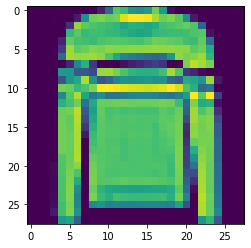

In [ ]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 32)         

## Compile the model


In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model


In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

callback_tb = TensorBoard(log_dir=log_dir , write_grads = True)
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=20,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/20
849/860 [============================>.] - ETA: 0s - loss: 0.5867 - accuracy: 0.7844
Epoch 1: val_loss improved from inf to 0.37082, saving model to model.weights.best.hdf5
860/860 [==============================] - 5s 5ms/step - loss: 0.5842 - accuracy: 0.7853 - val_loss: 0.3708 - val_accuracy: 0.8668
Epoch 2/20
858/860 [============================>.] - ETA: 0s - loss: 0.4059 - accuracy: 0.8531
Epoch 2: val_loss improved from 0.37082 to 0.32861, saving model to model.weights.best.hdf5
860/860 [==============================] - 4s 5ms/step - loss: 0.4060 - accuracy: 0.8530 - val_loss: 0.3286 - val_accuracy: 0.8850
Epoch 3/20
859/860 [============================>.] - ETA: 0s - loss: 0.3661 - accuracy: 0.8668
Epoch 3: val_loss improved from 0.32861 to 0.28524, saving model to model.weights.best.hdf5
860/860 [==============================] - 4s 5ms/step - loss: 0.3660 - accuracy: 0.8668 - val_loss: 0.2852 - val_accuracy: 0.8960
Epoch 4/20
850/860 [===========================

## Load Model with the best validation accuracy

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## Test Accuracy

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9210000038146973


## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

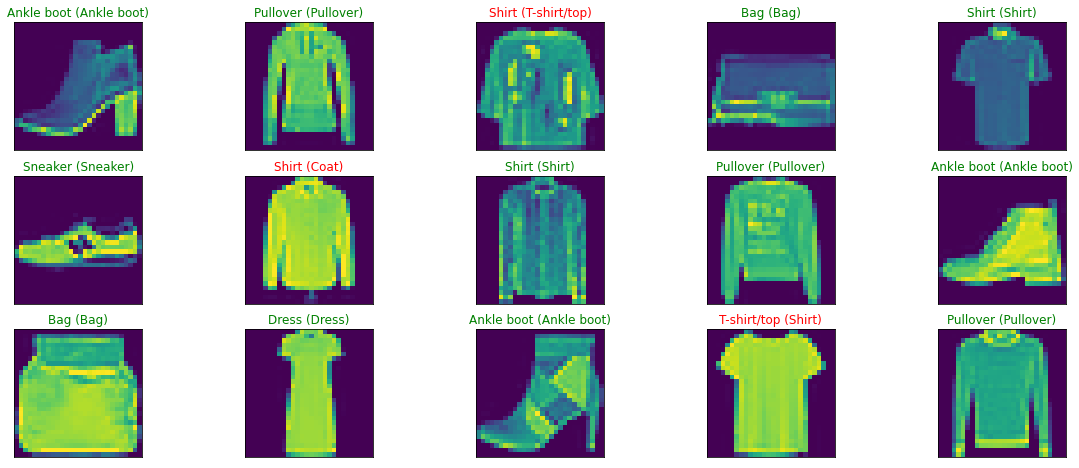

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Representing a Convolutional Neural Network as a Fully-Connected Neural Network 

### Implement exactly the following architecture using TensorFlow:
• Convolution layer with 64 filters, each 3x3, stride of 1 (i.e , apply the filter at all pixel locations), no padding.

• Max pool with a pooling width of 2x2, stride of 2, no padding.

• ReLU.

• Flatten the 64 feature maps into one long vector.

• Fully-connected layer to map into a 1024-dimensional vector.

• ReLU.

• Fully-connected layer to map into a 10-dimensional vector.

• Softmax.

Then train the network for a few epochs (the exact accuracy doesn’t matter for this problem).

In [ ]:
model_1 = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model_1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu',
                                  input_shape=(28, 28, 1)))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model_1.add(tf.keras.layers.ReLU())
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1024, activation='linear'))
model_1.add(tf.keras.layers.ReLU())
model_1.add(tf.keras.layers.Dense(10, activation='linear'))
model_1.add(tf.keras.layers.Softmax())

# # Take a look at the model summary
model_1.summary()
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.fit(x_train,
          y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_valid, y_valid))

# Evaluate the model on test set
score = model_1.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

model_1.summary()
model_1.trainable_variables
model_1.save("cnn_model")


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 re_lu_6 (ReLU)              (None, 13, 13, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 10816)             0         
                                                                 
 dense_14 (Dense)            (None, 1024)              11076608  
                                                                 
 re_lu_7 (ReLU)              (None, 1024)              0         
                                                      

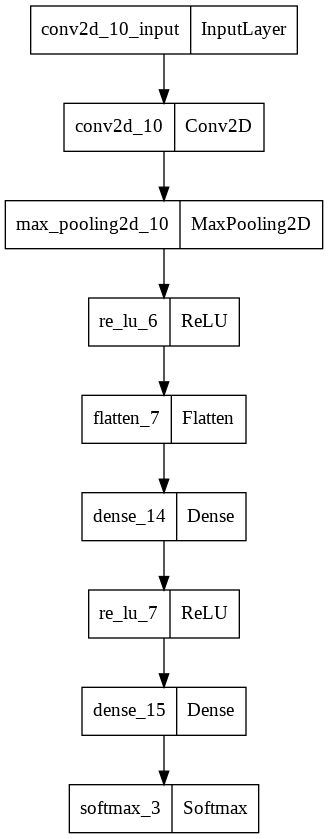

In [ ]:
tf.keras.utils.plot_model(model_1)

In [ ]:
def maxpool (input):
    res = []

    # convert (26,26,64) to (64,26,26)
    input = np.rollaxis(input, 2) 

    for x in input:
        num_rows = int(x.shape[0]/2)
        num_columns = int(x.shape[1]/2)
        feature_map = np.zeros((num_rows, num_columns))

        for i in range(num_rows):
            row = []
            for j in range(num_columns):
                    pool = []
                    for a in range(2):
                        for b in range(2):
                            pool.append(x[i*2+a, j*2+b])
                    feature_map[i, j] = np.max(pool)
        res.append(feature_map)
    res = np.asarray(res)
    res = np.rollaxis(res, 0, 3) # convert (64,13,13) to (13,13,64)
    return res

def softmax (x):
    return np.exp(x)/np.sum(np.exp(x))

def relu (x):
    return (x > 0) * x

def convolution(x,W1,b1):
    # print(W1.shape) # (3, 3, 1, 64) -> 3x3 matrix (9 arrays) where each array is a (1x64) vector
    filter_width = W1.shape[0] # 3
    num_filters = W1.shape[3] # 64
    output = []

    # loop to convolve all the filters over the image
    for k in range(num_filters):
        feature_map = np.zeros((x.shape[0] - filter_width + 1, x.shape[1] - filter_width + 1))
        filter = W1[:,:,0,k]
        # move filter vertically
        for i in range(x.shape[0] - filter_width + 1):
          # move filter horizontally
            for j in range(x.shape[1] - filter_width + 1):
                window = np.zeros((filter_width, filter_width))
                for m in range(filter_width):
                    for n in range(filter_width):
                        window[m,n] = x[i + m, j + n]
                # filter is multipled element-wise(*) with a section of the input image
                # the result is summed to obtain a single val using sum() 
                # then added with a bias term
                feature_map[i,j] = np.sum(window*filter) + b1[k]
        output.append(feature_map)
    output = np.asarray(output)
    output = np.rollaxis(output, 0, 3)
    return output

def forward_propagation(x, W1, b1, W2, b2, W3, b3):
    # convolution layer
    tensor = convolution(x, W1, b1)  # (26, 26, 64)
    # max pool layer
    tensor = maxpool(tensor)
    # relu layer
    tensor = relu(tensor)
    # flatten layer
    tensor = tensor.flatten()
    # fully connected layer (mapping into a 1024 dimensional vector)
    tensor = np.asarray(W2).T.dot(tensor) + np.asarray(b2)
    tensor = relu(tensor)
    # # fully connected layer (mapping into a 10 dimensional vector)
    tensor = np.asarray(W3).T.dot(tensor) + np.asarray(b3)
    # softmax layer
    yhat = softmax(tensor)

    return yhat

In [ ]:
model = tf.keras.models.load_model("cnn_model")
print(model.summary())

# Extract the weights from the TensorFlow model
k = model.trainable_variables
W1, b1, W2, b2, W3, b3 = k[0], k[1], k[2], k[3], k[4], k[5]

# Pick an arbitrary Fashion MNIST image, classify it, 
# and show that you get the exact same predictive distribution
x = x_test[0, :, :, :] # input: 28 x 28 x 1
fully_connected_yhat = forward_propagation(x, W1, b1, W2, b2, W3, b3)

# TensorFlow
tensorflow_yhat = model.predict(x_test)[0]
print("-----TensorFlow Convolutional Neural Network prediction-----")
print(tensorflow_yhat)

#  Fully-Connected Neural Network
print("-----Fully-connected Neural Network prediciton-----")
print(fully_connected_yhat)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 re_lu_6 (ReLU)              (None, 13, 13, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 10816)             0         
                                                                 
 dense_14 (Dense)            (None, 1024)              11076608  
                                                                 
 re_lu_7 (ReLU)              (None, 1024)              0         
                                                      